In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class mdp():

    def __init__(self, gamma, iters):
        self.gamma = gamma
        self.iters = iters
        self.grid = [[0] * 5 for _ in range(5)]
        self.value_history = []
        self.q_history = []  # Für die Q-Wert-Historie hinzufügen

    # Define the move to the left
    # return structure: [reward, x after action, y after action] 
    def move_left(self, x, y):
        if x == 0:
            return  [(-1),0,y]
        elif x == 3 and y == 0:
            return [5,x,2]
        elif x == 1 and y == 0:
            return [10,x,4]
        else:
            return [0,x-1,y]

    # Define the move to the right
    # return structure: [reward, x after action, y after action]
    def move_right(self,x, y):
        if x == 4:
            return [(-1),4,y]
        elif x == 3 and y == 0:
            return [5,x,2]
        elif x == 1 and y == 0:
            return [10,x,4]
        else:
            return [0,x+1,y]

    # Define the move up
    # return structure: [reward, x after action, y after action]
    def move_up(self,x, y):
        if x == 3 and y == 0:
            return [5,3,2]
        elif x == 1 and y == 0:
            return [10,1,4]
        elif y == 0:
            return [(-1),x,y]
        else:
            return [0,x,y-1]        

    # Define the move down
    # return structure: [reward, x after action, y after action]
    def move_down(self,x, y):
        if x == 3 and y == 0:
            return [5,x,2]
        elif x == 1 and y == 0:
            return [10,x,4]
        elif y == 4:
            return [(-1),x,y]
        else:
            return [0,x,y+1]

    # The iterative Bellmann function depending on state values
    def iterative_bellmann(self):
        # Define temporary grid to save temporary solutions for the value functions
        tmpGrid = [[0] * 5 for _ in range(5)]

        # Iterate over the defined steps
        for i in range(self.iters):
            # iterate through the 5 x 5 grid
            for y in range(5): 
                for x in range(5):
                    # Get the rewards and places after the movement for each cell in the grid
                    left = self.move_left(x, y)
                    right = self.move_right(x, y)
                    up = self.move_up(x, y)
                    down = self.move_down(x, y)

                    # Save the result of the new state function calculation for each grid cell 
                    tmpGrid[y][x] = (0.25 * (left[0] + (self.gamma) * self.grid[left[1]][left[2]]) 
                    + 0.25 * (right[0] + (self.gamma) * self.grid[right[1]][right[2]]) 
                    + 0.25 * (up[0] + (self.gamma) * self.grid[up[1]][up[2]]) 
                    + 0.25 * (down[0] + (self.gamma) * self.grid[down[1]][down[2]]))    

            # After each iteration save the temporary results in a new cell of the array list.
            self.value_history.append([tmpGrid[y][x] for y in range(5) for x in range(5)])
            self.grid = tmpGrid    
        
        # Visualize the grids    
        self.visualize_convergence()
        
    def visualize_convergence(self):
        # Erstelle ein Diagramm der Konvergenz mit Subplots für jede Zelle
        fig, axes = plt.subplots(5, 5, figsize=(20, 20))
        fig.suptitle('Konvergenz der State Value-Funktion über Iterationen', fontsize=16)

        for y in range(5):
            for x in range(5):
                # Werte für die aktuelle Zelle extrahieren
                values = [iteration[y * 5 + x] for iteration in self.value_history]
                axes[y, x].plot(values, label=f'Feld ({y}, {x})', color='blue')
                final_value = f'{values[-1]:.5f}'  # Letzter Wert auf 5 Nachkommastellen begrenzt
                axes[y, x].set_title(f'Feld ({y}, {x})')
                axes[y, x].set_xlabel('Iteration')
                axes[y, x].set_ylabel('State Value')
                axes[y, x].legend(loc='upper left')
                axes[y, x].grid()

                # Finale Werte im Diagramm hinzufügen
                axes[y, x].annotate(f'Final: {final_value}', xy=(self.iters - 1, values[-1]), 
                                    xytext=(5, 5), textcoords='offset points', fontsize=8, color='red')

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für den Titel
        plt.show()

    # Define q-value-function with random policy
    def action_value_function(self):
        for i in range(self.iters):
            new_q_values = [[[0] * 4 for _ in range(5)] for _ in range(5)]
            for y in range(5):
                for x in range(5):
                    actions = [
                        self.move_left(x, y),
                        self.move_right(x, y),
                        self.move_up(x, y),
                        self.move_down(x, y)
                    ]
                    
                    for action_index, (reward, new_x, new_y) in enumerate(actions):
                        # Calculate the expected reward for the random policy 
                        future_value = sum(0.25 * (reward_next + self.gamma * self.grid[ny][nx]) 
                                        for reward_next, nx, ny in [
                                            self.move_left(new_x, new_y),
                                            self.move_right(new_x, new_y),
                                            self.move_up(new_x, new_y),
                                            self.move_down(new_x, new_y)
                                        ])
                        # Save the q-values for the actions
                        new_q_values[y][x][action_index] = reward + self.gamma * future_value

            # Update grid with averaged Q-values as state values for convergence visualization
            self.grid = [[sum(new_q_values[y][x]) / 4 for x in range(5)] for y in range(5)]
            # Save the new values in the 
            self.q_history.append(new_q_values)
        self.visualize_q_values()

    # Visualize the q-values in subplots
    def visualize_q_values(self):
        fig, axes = plt.subplots(5, 5, figsize=(20, 20))
        fig.suptitle('Q-Werte Visualisierung', fontsize=16)

        for y in range(5):
            for x in range(5):
                q_values = [self.q_history[iter_idx][y][x] for iter_idx in range(self.iters)]
                max_q_values = [max(q) for q in q_values]
                axes[y, x].plot(max_q_values, label=f'Feld ({y}, {x})', color='green')
                final_q_value = f'{max_q_values[-1]:.5f}'
                axes[y, x].set_title(f'Feld ({y}, {x})')
                axes[y, x].set_xlabel('Iteration')
                axes[y, x].set_ylabel('Max Q-Wert')
                axes[y, x].legend(loc='upper left')
                axes[y, x].grid()
                
                # Finalen Q-Wert hinzufügen
                axes[y, x].annotate(f'Final: {final_q_value}', xy=(self.iters - 1, max_q_values[-1]), 
                                    xytext=(5, 5), textcoords='offset points', fontsize=8, color='red')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

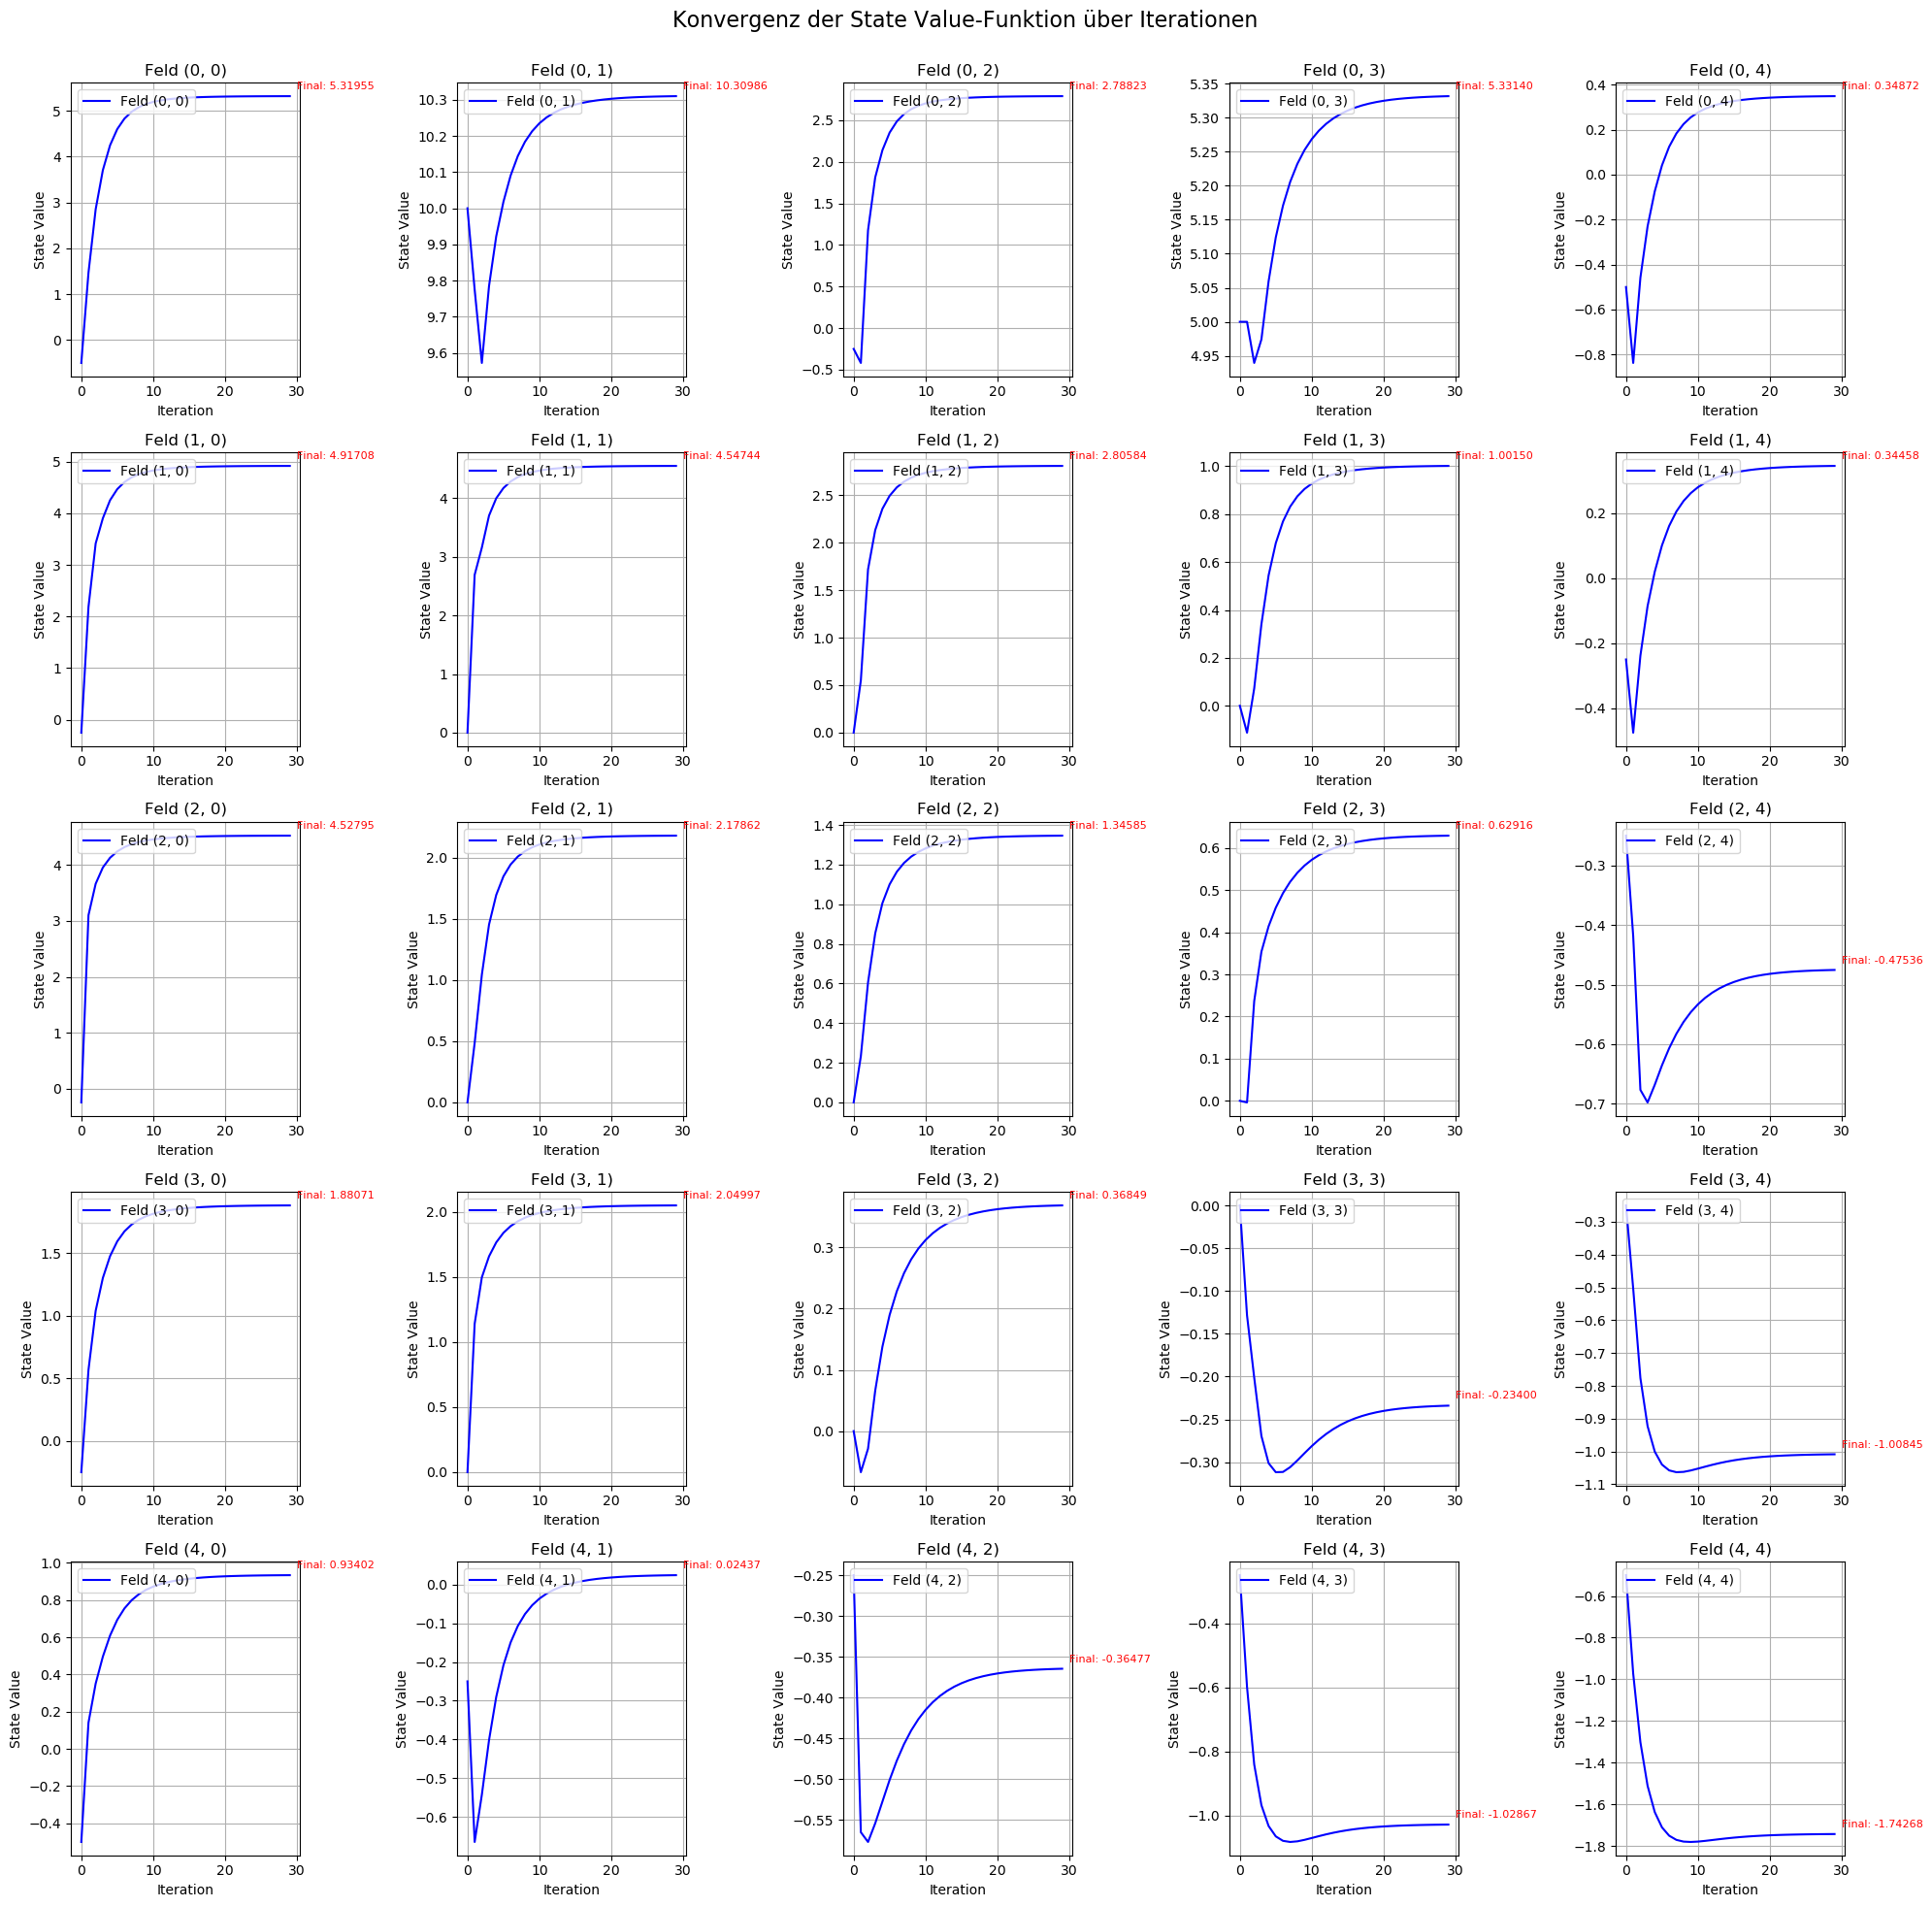

In [17]:
# Make an instance of the mdp class
# Gamma is 0.9 as in the given assignment
# Iterations are 30. One can set more, but 30 is enough to see convergence and also the differences in the curves at the beginning
mdp1 = mdp(gamma=0.9,iters=30)
mdp1.iterative_bellmann()

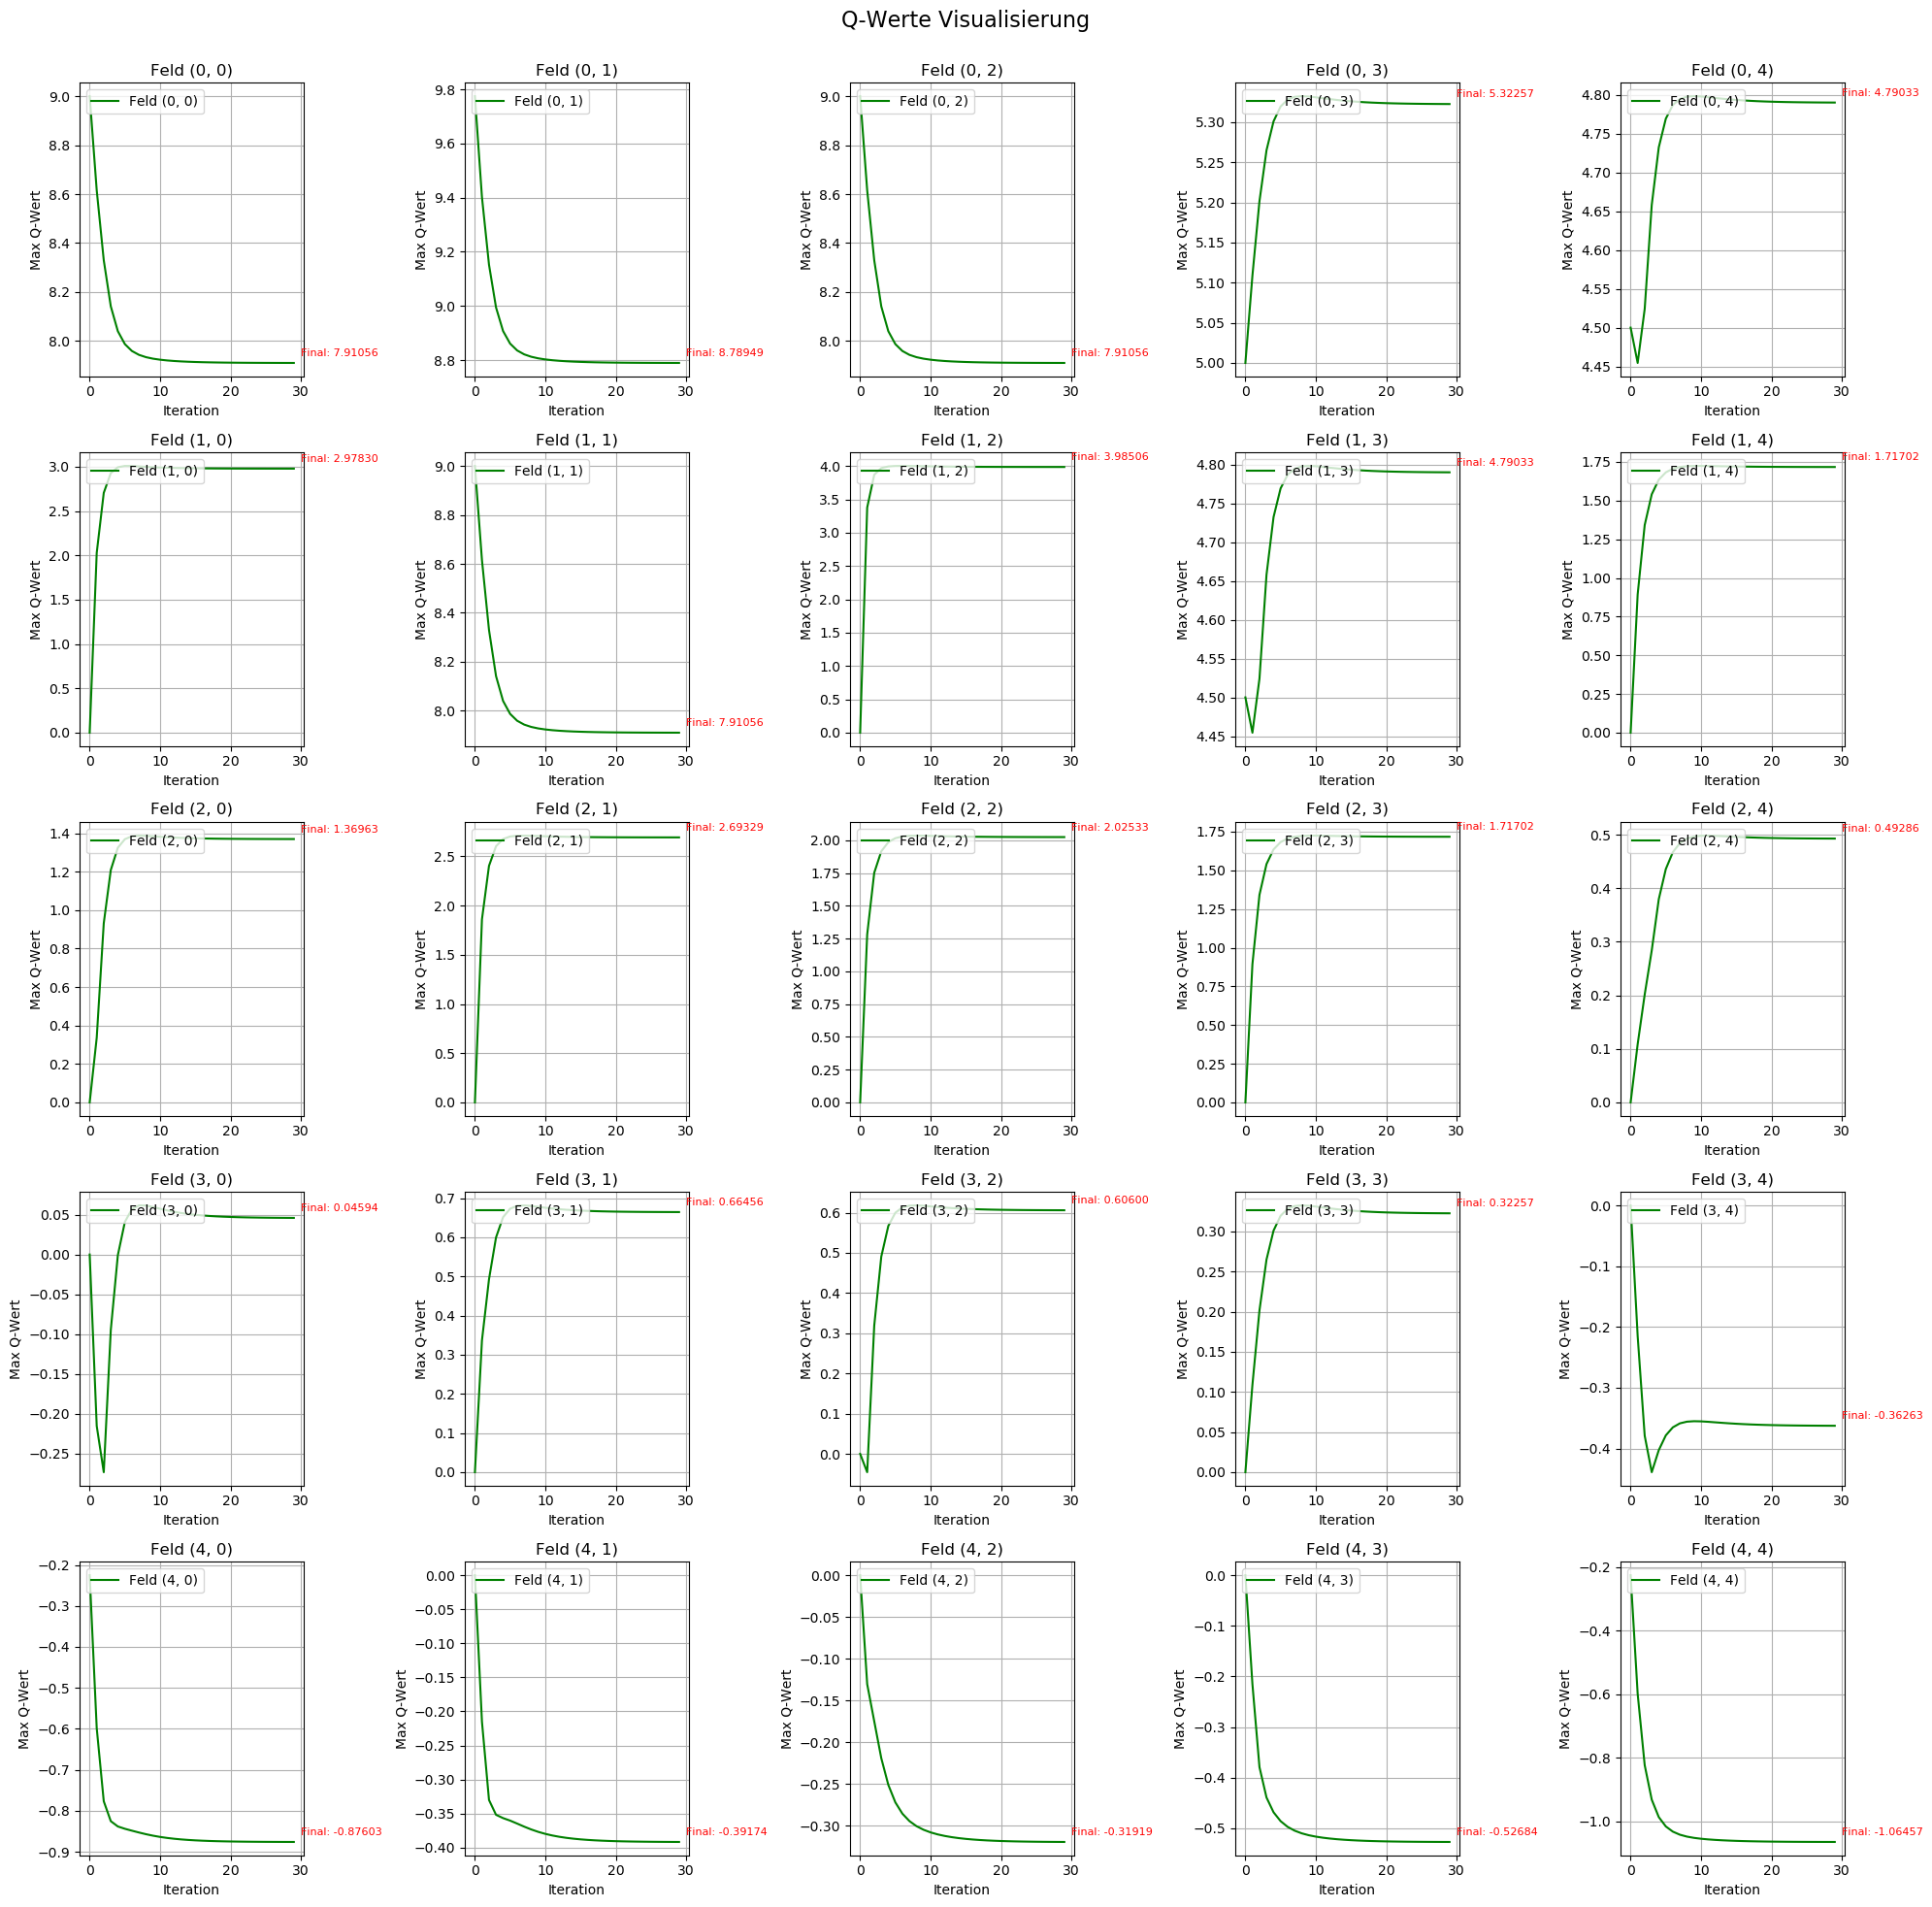

In [25]:
# Make an instance of the mdp class
# Gamma is 0.9 as in the given assignment
# Iterations are 100
# The goal is to show the action value function for every field throughout the iterations
mdp2 = mdp(gamma=0.9,iters=30)
mdp2.action_value_function()